In [3]:
import io
import requests
from PIL import Image
import torch
import numpy
from datasets import load_dataset
from transformers import DetrFeatureExtractor, DetrForSegmentation

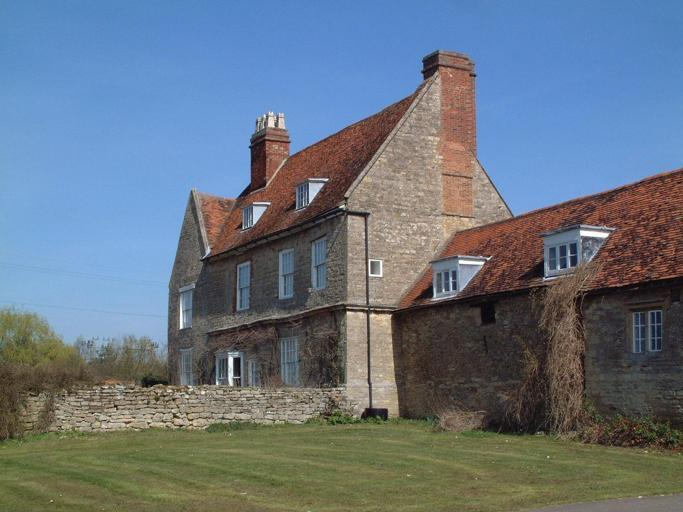

In [31]:
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])
# image = Image.open(ds[0]['file']).resize((256,256))
image

In [32]:
feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

/home/server/.local/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


In [33]:
# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")
pixel_values = inputs["pixel_values"]

In [34]:
outputs = model.forward(pixel_values)

In [35]:
pixel_values.shape

torch.Size([1, 3, 800, 1067])

In [36]:
[outputs[i].shape for i in range(5)]

[torch.Size([1, 100, 251]),
 torch.Size([1, 100, 4]),
 torch.Size([1, 100, 200, 267]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 850, 256])]

In [37]:
outputs = model.forward(pixel_values,output_hidden_states=True)

In [52]:
[outputs[i].shape for i in range(4)]

[torch.Size([1, 100, 251]),
 torch.Size([1, 100, 4]),
 torch.Size([1, 100, 200, 267]),
 torch.Size([1, 100, 256])]

In [58]:
[outputs[4][i].shape for i in range(7)]

[torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256]),
 torch.Size([1, 100, 256])]

In [59]:
import matplotlib.pyplot as plt

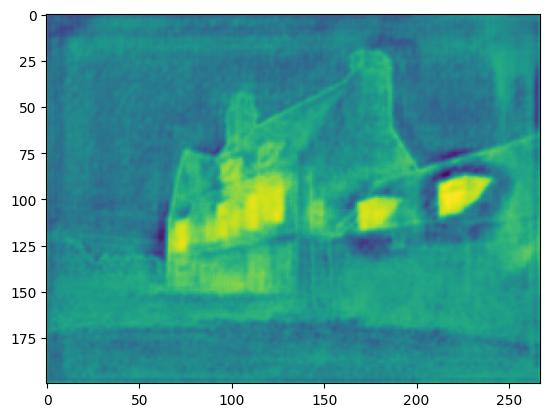

In [68]:
plt.imshow(outputs[2][0][0].detach())

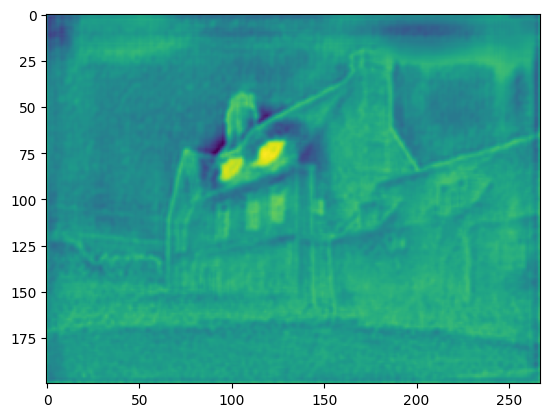

In [69]:
plt.imshow(outputs[2][0][1].detach())

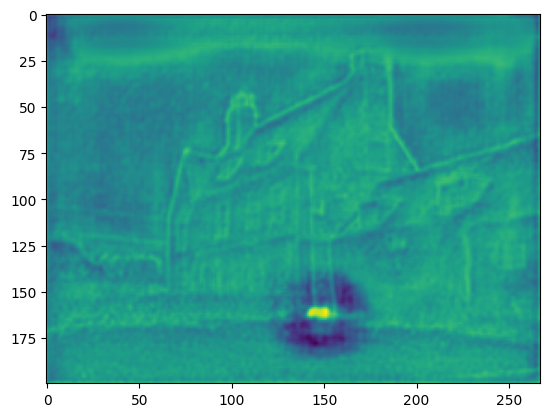

In [70]:
plt.imshow(outputs[2][0][2].detach())

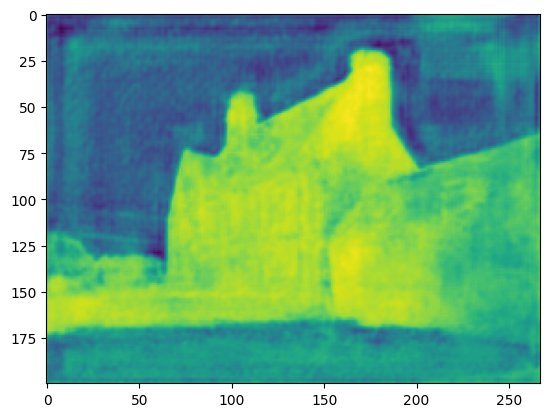

In [71]:
plt.imshow(outputs[2][0][3].detach())